In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [2]:
# Read in 1st dataset
df = pd.read_csv('../data/211103-IF-b1-integrin-LV-188-401-402-Nikon-40xOil/211103-IF-E13-Cas9-bud-3d-beta1-integrin-LV-188-line-scan-output/211103-IF-E13-Cas9-bud-3d-beta1-integrin-LV-188-Ecad-quantification-Summary-592.txt')
df.head()

# 7 organoids of control sgRNA, 5 edges quantified per organoid
df['groups'] = ['sg-Control']*35
df['organoid_id'] = ['1']*5 + ['2']*5 + ['3']*5 + ['4']*5 + ['5']*5 + ['6']*5 + ['7']*5
df['sample_id'] = [df.groups[i] + '_' + df.organoid_id[i] for i in range(len(df))]

# pass to new variable
df1 = df

# Check the header
df1.head()


,file_name,edge_category,id,b1int_AUC,b1int_peak_height,NLSmSL_cell_1,NLSmSL_cell_2,z_position,groups,organoid_id,sample_id
0,1,High_High,1,2877.8604,523.2205,300.9961,590.8175,18,sg-Control,1,sg-Control_1
1,1,High_High,2,4928.3426,709.3208,499.5153,524.0477,21,sg-Control,1,sg-Control_1
2,1,High_High,3,1826.4211,480.2500,374.7908,527.0947,21,sg-Control,1,sg-Control_1
3,1,High_High,4,2481.1303,469.5478,556.1975,713.8285,14,sg-Control,1,sg-Control_1
4,1,High_High,5,3707.4365,308.6449,1209.5171,1036.6883,13,sg-Control,1,sg-Control_1


In [3]:
# Read in 2nd dataset
df = pd.read_csv('../data/211103-IF-b1-integrin-LV-188-401-402-Nikon-40xOil/211103-IF-E13-Cas9-bud-3d-beta1-integrin-LV-401-line-scan-output/211103-IF-E13-Cas9-bud-3d-beta1-integrin-LV-401-Ecad-quantification-Summary-6969.txt')
df.head()

# 7 organoids of control sgRNA, 5 edges quantified per organoid
df['groups'] = ['sg1-Itgb1']*35
df['organoid_id'] = ['1']*5 + ['2']*5 + ['3']*5 + ['4']*5 + ['5']*5 + ['6']*5 + ['7']*5
df['sample_id'] = [df.groups[i] + '_' + df.organoid_id[i] for i in range(len(df))]

# pass to new variable
df2 = df

# Check the header
df2.head()


,file_name,edge_category,id,b1int_AUC,b1int_peak_height,NLSmSL_cell_1,NLSmSL_cell_2,z_position,groups,organoid_id,sample_id
0,1,High_High,1,452.4394,157.9768,973.7837,2836.1450,6,sg1-Itgb1,1,sg1-Itgb1_1
1,1,High_High,2,402.8153,104.0432,1310.4095,1139.9922,10,sg1-Itgb1,1,sg1-Itgb1_1
2,1,High_High,3,933.0017,70.2487,1468.6579,1368.6312,10,sg1-Itgb1,1,sg1-Itgb1_1
3,1,High_High,4,1316.4910,107.3575,1214.7846,1313.9558,17,sg1-Itgb1,1,sg1-Itgb1_1
4,1,High_High,5,541.8799,112.6101,2013.6561,4094.5892,4,sg1-Itgb1,1,sg1-Itgb1_1


In [4]:
# Read in 3rd dataset
df = pd.read_csv('../data/211103-IF-b1-integrin-LV-188-401-402-Nikon-40xOil/211103-IF-E13-Cas9-bud-3d-beta1-integrin-LV-402-line-scan-output/211103-IF-E13-Cas9-bud-3d-beta1-integrin-LV-402-Ecad-quantification-Summary-8374.txt')
df.head()

# 6 organoids of control sgRNA, 5 edges quantified per organoid
df['groups'] = ['sg2-Itgb1']*30
df['organoid_id'] = ['1']*5 + ['2']*5 + ['3']*5 + ['4']*5 + ['5']*5 + ['6']*5
df['sample_id'] = [df.groups[i] + '_' + df.organoid_id[i] for i in range(len(df))]

# pass to new variable
df3 = df

# Check the header
df3.head()


,file_name,edge_category,id,b1int_AUC,b1int_peak_height,NLSmSL_cell_1,NLSmSL_cell_2,z_position,groups,organoid_id,sample_id
0,1,High_High,1,418.1767,59.6561,1498.8975,1914.9096,8,sg2-Itgb1,1,sg2-Itgb1_1
1,1,High_High,2,90.1825,28.9904,1718.4635,1286.8686,8,sg2-Itgb1,1,sg2-Itgb1_1
2,1,High_High,3,715.4984,75.1782,855.4341,977.7119,19,sg2-Itgb1,1,sg2-Itgb1_1
3,1,High_High,4,144.2008,137.1601,582.1350,1075.5970,17,sg2-Itgb1,1,sg2-Itgb1_1
4,1,High_High,5,623.1928,76.2010,1144.3643,1136.6274,12,sg2-Itgb1,1,sg2-Itgb1_1


In [5]:
# Concatenate the 3 dataframes and reset the index
df = pd.concat([df1, df2, df3])
df.reset_index(inplace=True)

# Check the header
df.head()

,index,file_name,edge_category,id,b1int_AUC,b1int_peak_height,NLSmSL_cell_1,NLSmSL_cell_2,z_position,groups,organoid_id,sample_id
0,0,1,High_High,1,2877.8604,523.2205,300.9961,590.8175,18,sg-Control,1,sg-Control_1
1,1,1,High_High,2,4928.3426,709.3208,499.5153,524.0477,21,sg-Control,1,sg-Control_1
2,2,1,High_High,3,1826.4211,480.2500,374.7908,527.0947,21,sg-Control,1,sg-Control_1
3,3,1,High_High,4,2481.1303,469.5478,556.1975,713.8285,14,sg-Control,1,sg-Control_1
4,4,1,High_High,5,3707.4365,308.6449,1209.5171,1036.6883,13,sg-Control,1,sg-Control_1


In [6]:
# Normalize all peak height to the average of control
ctrl_average = df1.b1int_peak_height.mean()

df['b1int_peak_height_normed'] = df['b1int_peak_height'] / ctrl_average

In [7]:
tukeyTest(df.b1int_peak_height_normed, df.groups)

Summary of test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
sg-Control sg1-Itgb1  -0.7808  0.001 -0.9408 -0.6207   True
sg-Control sg2-Itgb1  -0.8722  0.001 -1.0388 -0.7056   True
 sg1-Itgb1 sg2-Itgb1  -0.0914 0.3965  -0.258  0.0751  False
-----------------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.39651125]


<AxesSubplot:xlabel='groups', ylabel='b1int_peak_height_normed'>

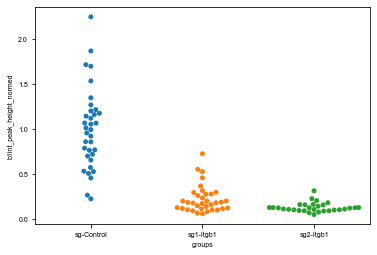

In [8]:
sns.swarmplot(df.groups, df.b1int_peak_height_normed)

## Plots for figures

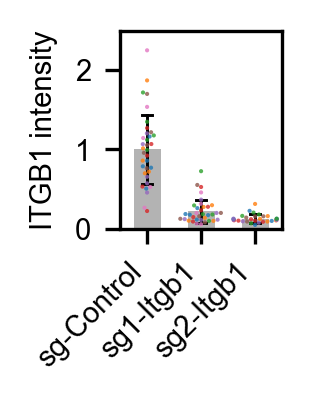

In [9]:
# Swarm plot of 4 categories

outputPrefix = '211103-IF-b1-integrin-swarm'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width = 0.9
fig_height = 1.2

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax = fig.add_axes([0.35, 0.4, 0.6, 0.55])

ax = sns.swarmplot(x='groups', y='b1int_peak_height_normed', data=df,
                   hue='organoid_id',
#                    palette={'1': 'red', '2': 'green', '3': 'blue', '4': yellow', '5': 'purple'},
#                    color="blue",
                   size=1.0, alpha=.8)

ax = sns.barplot(x='groups', y='b1int_peak_height_normed', data=df,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci='sd')

plt.ylim(0, 2.5)
# plt.yticks([0, 3, 6])

plt.xlabel(None)
# plt.ylabel(r"$\beta$1-integrin intensity")
plt.ylabel('ITGB1 intensity')

# make the bar width narrower
change_bar_width(ax, .5)

# rotate x tick labels
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


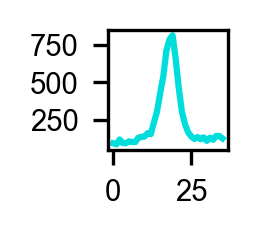

In [10]:
# Example linescan profile

df_example = pd.read_csv('../data/211103-IF-b1-integrin-LV-188-401-402-Nikon-40xOil/211103-IF-E13-Cas9-bud-3d-beta1-integrin-LV-188-line-scan-output/raw-linescan-profile-record/1-2-b1int.txt')

df_example['pixels'] = list(range(len(df_example)))

outputPrefix = '211103-b1-integrin-line-scan-example'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=0.5
fig_height=0.5
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plt.plot(df_example.pixels, df_example.b1int_intensity, color='#00dddd')

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


In [12]:
# get descriptive stats for all groups
df.groupby('groups').describe()['b1int_peak_height_normed']

,count,mean,std,min,25%,50%,75%,max
groups,,,,,,,,
sg-Control,35.0,1.000000,0.447805,0.222793,0.709387,0.994499,1.190125,2.251873
sg1-Itgb1,35.0,0.219238,0.151135,0.056301,0.114192,0.178813,0.275159,0.725794
sg2-Itgb1,30.0,0.127812,0.052035,0.047530,0.098386,0.120830,0.151462,0.312301
